<a href="https://colab.research.google.com/github/maryamarief96/CE888/blob/master/DS_96_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#,names=['f1', 'f2', 'f3', 'f4', 'f5','f6','f7','f8','f9','f10','f11', 'f12', 'f13', 'f14', 'f15','f16','f17','f18','f19','f20','f21', 'f22', 'f23', 'f24', 'f25','f26','f27','f28','f29','f30','f31', 'f32', 'f33', 'f34', 'f35','f36','f37','f38','f39','f40','f41', 'f42', 'f43', 'f44', 'f45','f46','f47','f48','f49','f50','f51', 'f52', 'f53', 'f54', 'f55','f56','f57','f58','target']

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
drive_data_path = 'gdrive/My Drive/DS_Driver/'

In [0]:
df=pd.read_csv(drive_data_path+"train.csv", delimiter = ","
,low_memory=False)

In [0]:
features=list(df.columns)
features.remove('target')

In [0]:
outcomes_of_interest=['target']

In [0]:
counts=df['target'].value_counts()

In [0]:
if counts[0]>counts[1]:
  percent_imbalance=counts[0]/(counts[0]+counts[1])

else:
  percent_imbalance=counts[1]/(counts[0]+counts[1])

print("percent imbalance: "+ str(round(percent_imbalance*100)) +"%")


percent imbalance: 96.0%


In [0]:
#DATA CLEANING

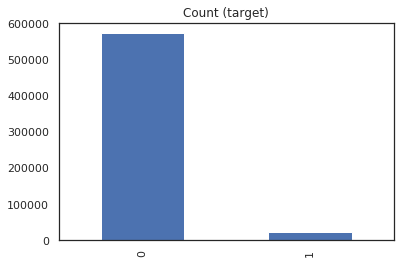

In [0]:
counts.plot(kind='bar', title='Count (target)');

In [0]:
df.dtypes

id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_cat       int64
ps_car_11_cat       int64
ps_car_11           int64
ps_car_12         float64
ps_car_13         float64
ps_car_14         float64
ps_car_15   

In [0]:
df[(df == -1)] = np.nan

In [0]:
df.replace(np.nan, -1, inplace=True)

In [0]:
X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

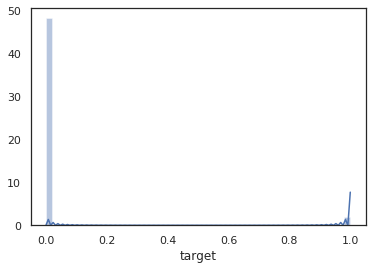

In [0]:
sns.distplot(df['target'])

In [0]:
X=X_df
y=y_df

In [0]:


#pca = PCA(n_components=2)
#X = pca.fit_transform(X)


In [0]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_df.corr()

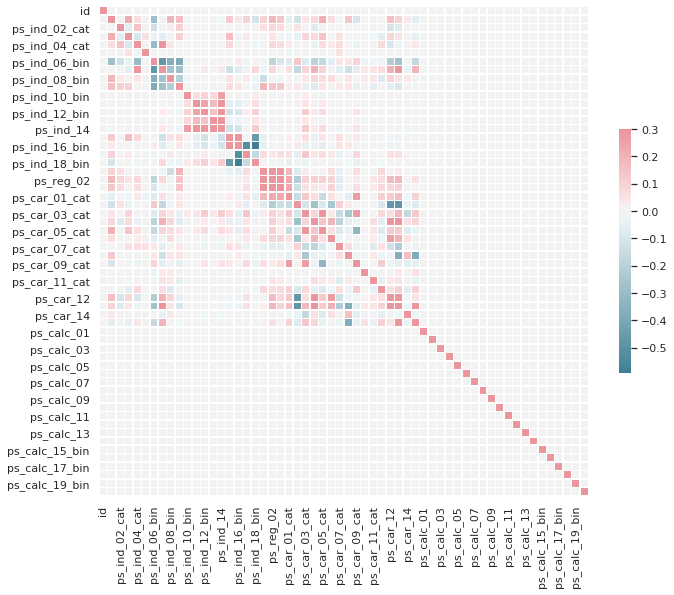

In [0]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [0]:
useless=['ps_calc_01' ,
'ps_calc_02' ,
'ps_calc_03',
'ps_calc_04' ,
'ps_calc_05' ,
'ps_calc_06' ,
'ps_calc_07' ,
'ps_calc_08' ,
'ps_calc_09' ,
'ps_calc_10' ,
'ps_calc_11',
'ps_calc_12' ,
'ps_calc_13' ,
'ps_calc_14',
'ps_calc_15_bin' ,
'ps_calc_16_bin' ,
'ps_calc_17_bin' ,
'ps_calc_18_bin' ,
'ps_calc_19_bin' ,
'ps_calc_20_bin']

In [0]:
X

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,-1.0,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,-1.0,0,-1.0,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7.0,1.0,-1.0,0,-1.0,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,-1.0,0,-1.0,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,3,1.0,10,0.0,0.0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10.0,1.0,-1.0,0,1.0,1,1.0,1,0.0,1,31,3.0,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,5,1.0,3,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9.0,1.0,-1.0,0,-1.0,15,0.0,0,2.0,1,63,2.0,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,1,1.0,10,0.0,0.0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7.0,1.0,-1.0,0,-1.0,1,1.0,1,2.0,1,31,3.0,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,5,2.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11.0,1.0,-1.0,0,-1.0,11,1.0,1,2.0,1,101,3.0,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [0]:
X = X.drop(X.loc[:, 'ps_calc_01':'ps_calc_20_bin'].columns, axis = 1) 


In [0]:
X

In [0]:
X = StandardScaler().fit_transform(X)

In [0]:
X.shape

(595212, 38)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0, stratify=y, shuffle=True)

In [0]:
y_train.shape

(446409, 1)

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)

X_train

array([[ 1.72673949,  0.17616881],
       [ 0.24910051, -0.08072413],
       [ 0.63311511,  0.43724726],
       ...,
       [ 1.07693054,  1.18898442],
       [ 4.57514163,  0.08222728],
       [ 4.10216708, -1.49329883]])

In [0]:


smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
X_sm

array([[ 1.72673949,  0.17616881],
       [ 0.24910051, -0.08072413],
       [ 0.63311511,  0.43724726],
       ...,
       [-0.38435279,  0.24733344],
       [-0.21426526, -0.4548827 ],
       [ 0.20404461, -0.60870171]])

In [0]:
y_sm

array([0, 0, 0, ..., 1, 1, 1])

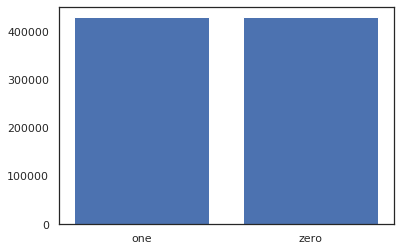

In [0]:
one=np.count_nonzero(y_sm == 1)

zero=np.count_nonzero(y_sm == 0)

height=[one,zero]
bars=['one','zero']
y_pos = np.arange(len(bars))


plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
